In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import squarify
from highlight_text import fig_text
from pypalettes import load_cmap
from pyfonts import load_font
from matplotlib.patches import Patch

df = pd.read_csv("data.csv")
df.head()

,country,price,continent
0,USA,33.9,North America
1,Australia,27.2,Oceania
2,UK,24.8,Europe
3,Italy,23.0,Europe
4,Canada,21.9,North America


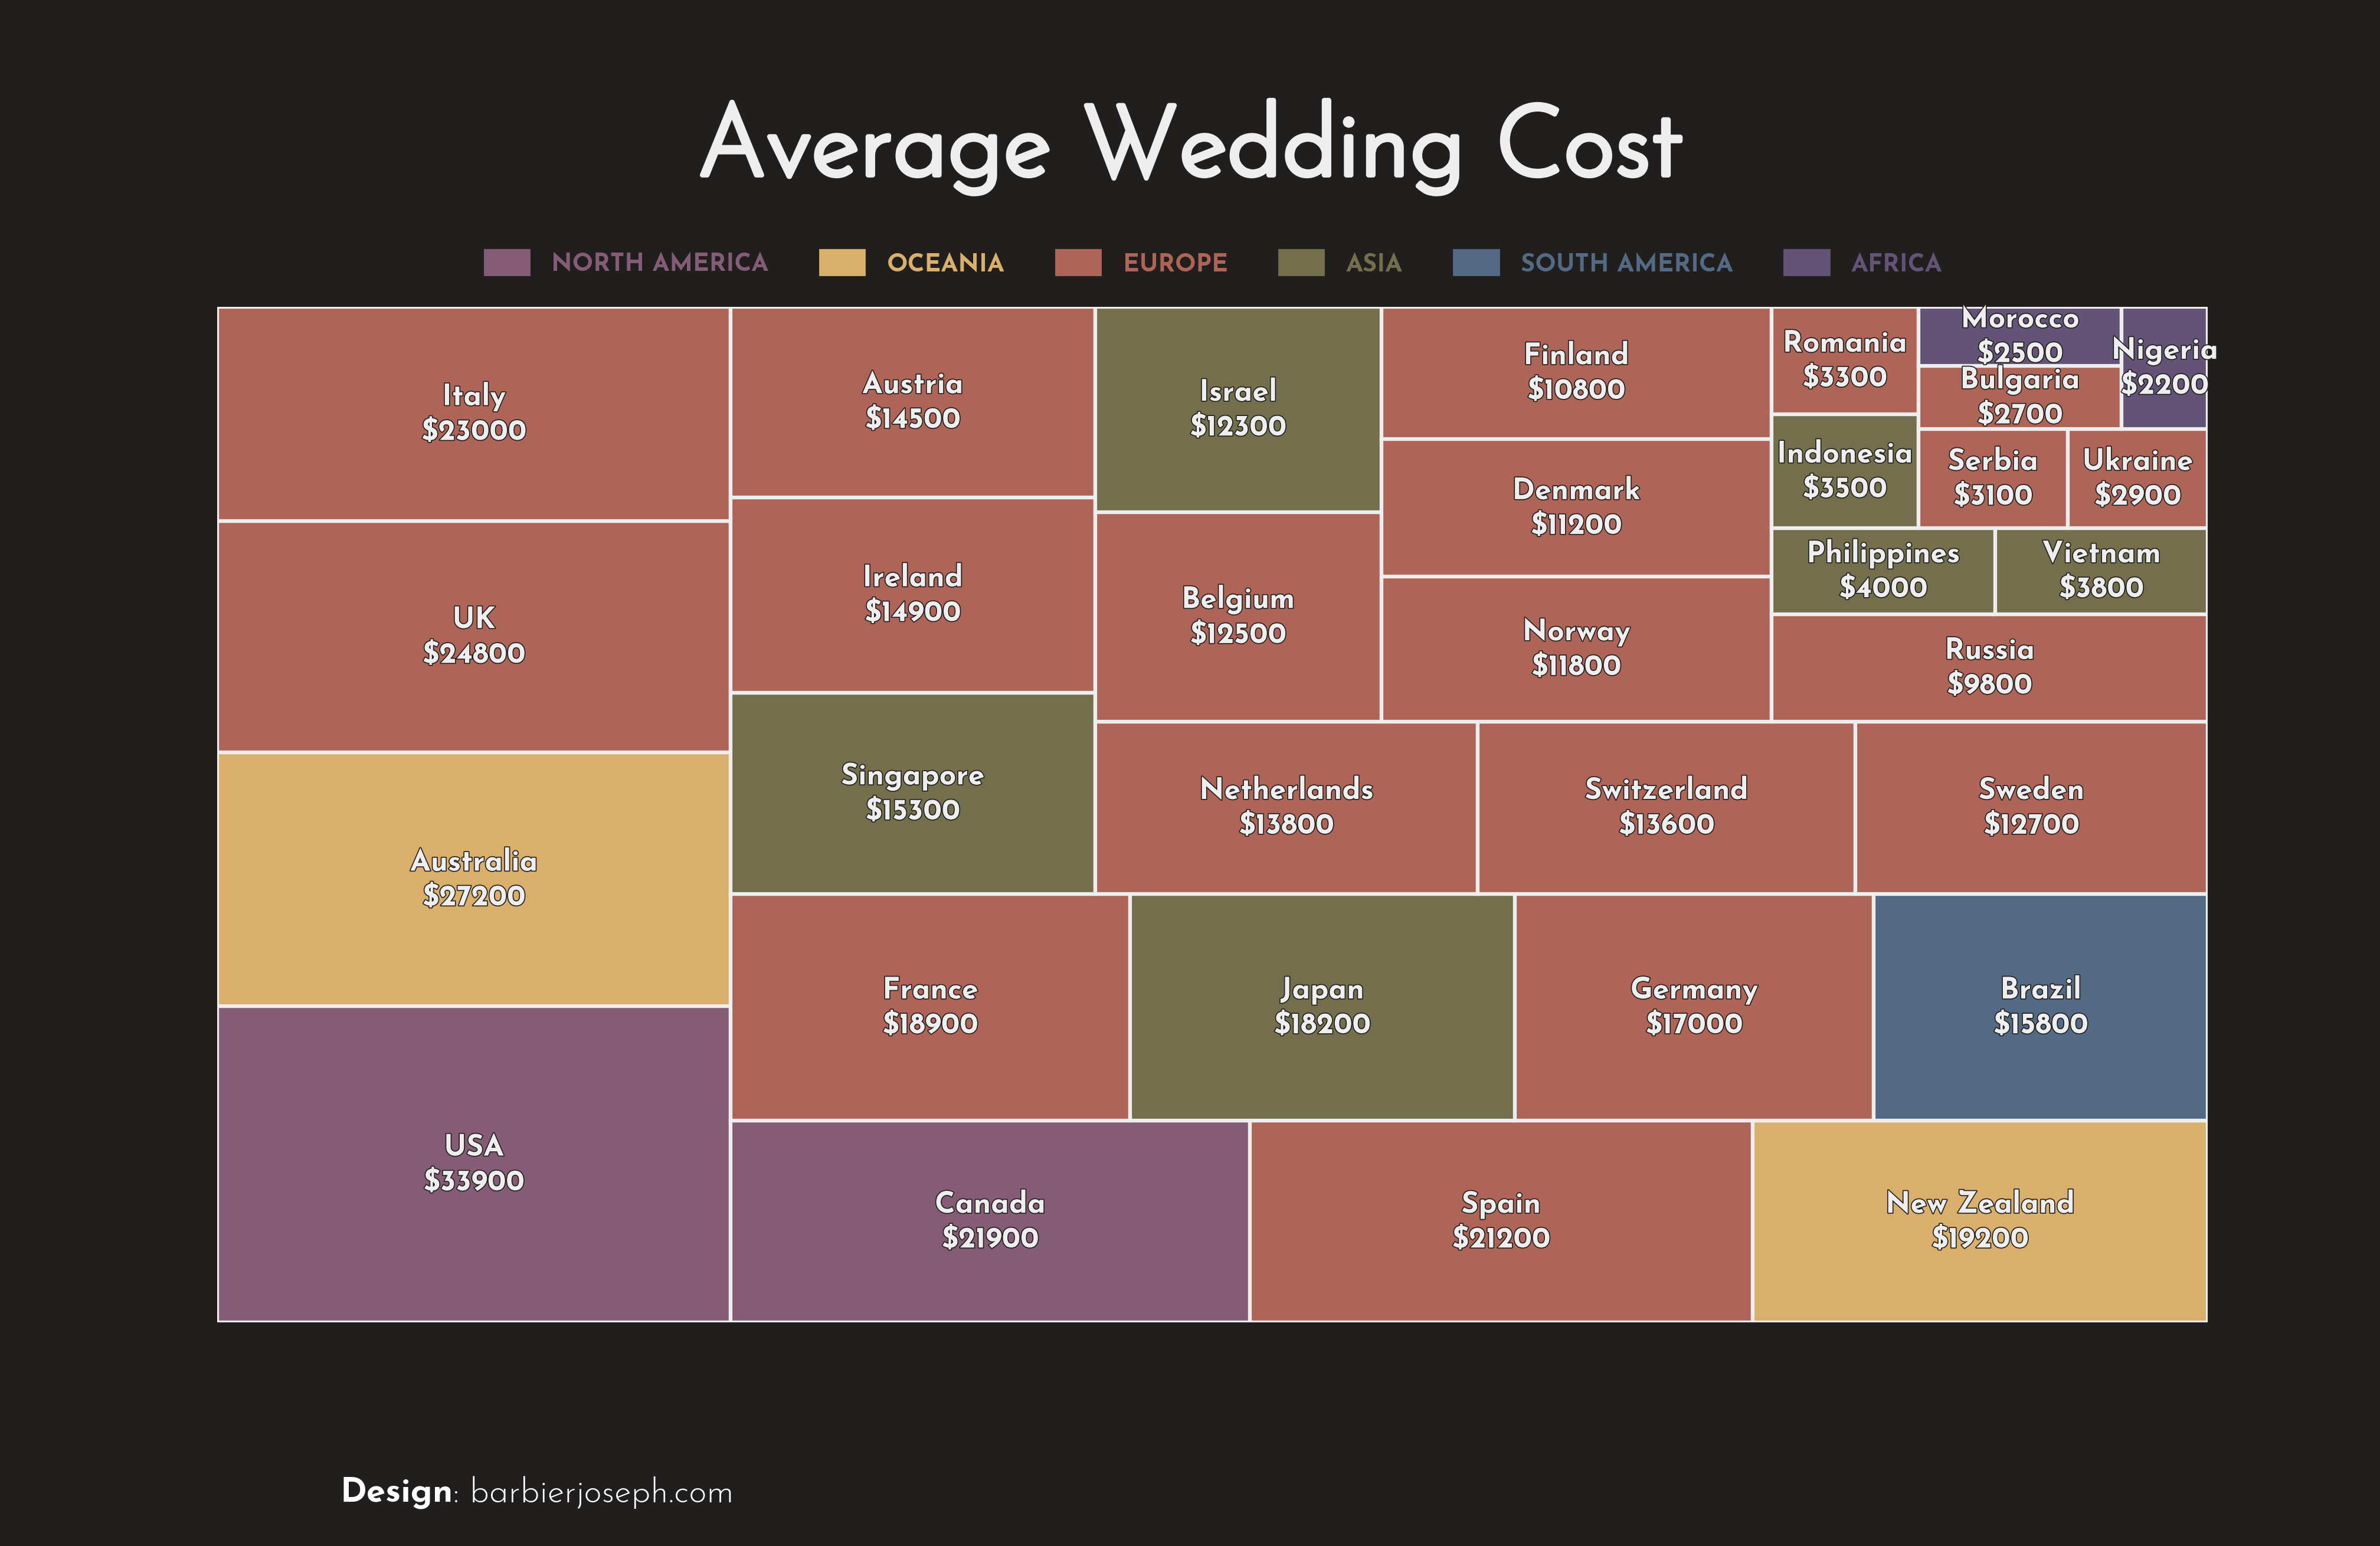

In [121]:
white = '#EEEEEE'
black = '#211E1E'
cmap = load_cmap('Antique')
category_codes, unique_categories = pd.factorize(df['continent'])
colors = [cmap(code) for code in category_codes]
font = load_font(
   'https://github.com/googlefonts/josefinsans/blob/master/fonts/ttf/JosefinSans-Light.ttf?raw=true'
)
boldfont = load_font(
   'https://github.com/googlefonts/josefinsans/blob/master/fonts/ttf/JosefinSans-Bold.ttf?raw=true'
)

fig, ax = plt.subplots(figsize=(12,8), dpi=300)
fig.set_facecolor(black)
ax.set_axis_off()

squarify.plot(
   sizes=df["price"],
   label=df["country"] + "\n$" + (df["price"]*1000).astype(int).astype(str),
   color=colors,
   edgecolor=white,
   lw=1.5,
   text_kwargs={
      'font': boldfont,
      'color': white,
      'size': 12,
      'path_effects': [
         path_effects.Stroke(linewidth=0.8, foreground=black),
         path_effects.Normal()
      ]
   },
   ax=ax
)

fig_text(
   x=0.5, y=1, s="Average Wedding Cost", font=font,
   size=40, ha='center', color=white, path_effects=[
         path_effects.Stroke(linewidth=2, foreground=white),
         path_effects.Normal()
      ]
)
fig_text(
   x=0.1, y=0.03, s='Design<: @joseph_barbier>\n', font=boldfont,
   size=14, ha='left', color='white', highlight_textprops=[{'font': font}]
)

legend_elements = [
   Patch(
      facecolor=cmap(code),
      edgecolor=black,
      label=continent.upper(),
   ) for code, continent in enumerate(unique_categories)
]

legend = ax.legend(
   handles=legend_elements,
   loc='upper center',
   bbox_to_anchor=(0.5, 1.08),
   ncol=len(unique_categories),
   fontsize=30,
   facecolor=black,
   prop=boldfont,
   edgecolor=black,
   handleheight=1.5,
   
)

for i, text in enumerate(legend.get_texts()):
   text.set_color(cmap(i))

marginLR = 0.05
marginBT = 0.05
fig.text(x=0-marginLR, y=0.5, s=' ', color=black, ha='center', va='center')
fig.text(x=1+marginLR, y=0.5, s=' ', color=black, ha='center', va='center')
#fig.text(x=0.5, y=0-marginBT, s=' ', color=black, ha='center', va='center')
fig.text(x=0.5, y=1+marginBT, s=' ', color=black, ha='center', va='center')

plt.tight_layout()
plt.savefig('wedding-cost.png', dpi=300, bbox_inches='tight')
plt.show()